In [30]:
### IMPORT LIBRARIES ###

# IMPORT SCIENTIFIC LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib inline
import pandas as pd
import seaborn as sns

# IMPORT CUSTOM LIBRARIES
from libraries.IN8_read_data import read_IN8scan, read_IN8scan_specJun24, gen_data_df_specJun24
from functions import *

from alias import *

In [31]:
### IMPORT OF MEASUREMENTS DATA ###
data = gen_data_df_specJun24('./data/scan_database.tsv', './data/rawdata/')
sumup_col = ['name', 'notes', 'date', 'time', 'QM', 'E', 'steps']
display(data[sumup_col])

Scan 50320 not found
Scan 50321 not found
Scan 50322 not found
Scan 50323 not found
Scan 50324 not found
Scan 50325 not found
Scan 50326 not found
Scan 50327 not found
Scan 50328 not found
Scan 50329 not found
Scan 50330 not found
Scan 50331 not found
Scan 50332 not found
Scan 50333 not found
Scan 50334 not found
Scan 50335 not found
Scan 50336 not found


,name,notes,date,time,QM,E,steps
Nscan,,,,,,,
50304,sc a5,STOP,03-Jun-24,15:08:38,4.904906,-0.0134,A5= 0.1000
50305,sc a5,Scan a 2theta fisso per allineare l'analizzato...,03-Jun-24,15:08:49,4.904906,-0.0134,A5= 0.2000
50306,sc a3,Allineamento slit nel pentolone a3 => 10,03-Jun-24,15:19:27,4.904922,-0.0134,A3= 2.0000
50307,sc ei 69.68 dei 0.5 np 15 mn 2000,vediamo lo scan in energia,03-Jun-24,15:32:02,4.843829,-3.5464,EI= 0.5000
50308,sc ei 69.68 dei 0.5 np 15 mn 2000,rivediamo lo scan in ei,03-Jun-24,15:41:02,4.842048,-3.5464,EI= 0.5000
50309,sc ei 69.68 dei 0.5 np 15 mn 2000,"Facciamo una risoluzione al volo, andrà rifatta",03-Jun-24,15:54:15,0.707931,-3.5464,EI= 0.5000
50310,bs d1t 30,mettiamo la slit d1t a 20 mm,03-Jun-24,16:49:50,0.701002,-0.0134,D1T= -2.0000
50311,bs d1l 30,mettiamo la slit d1l a 13 mm,03-Jun-24,17:00:31,0.701002,-0.0134,D1L= -2.0000
50312,empty .7 300K 5000,NaN,03-Jun-24,17:49:32,0.700555,-15.0154,EN= 0.5000


# Empty cells

(-7.0, 7.0)

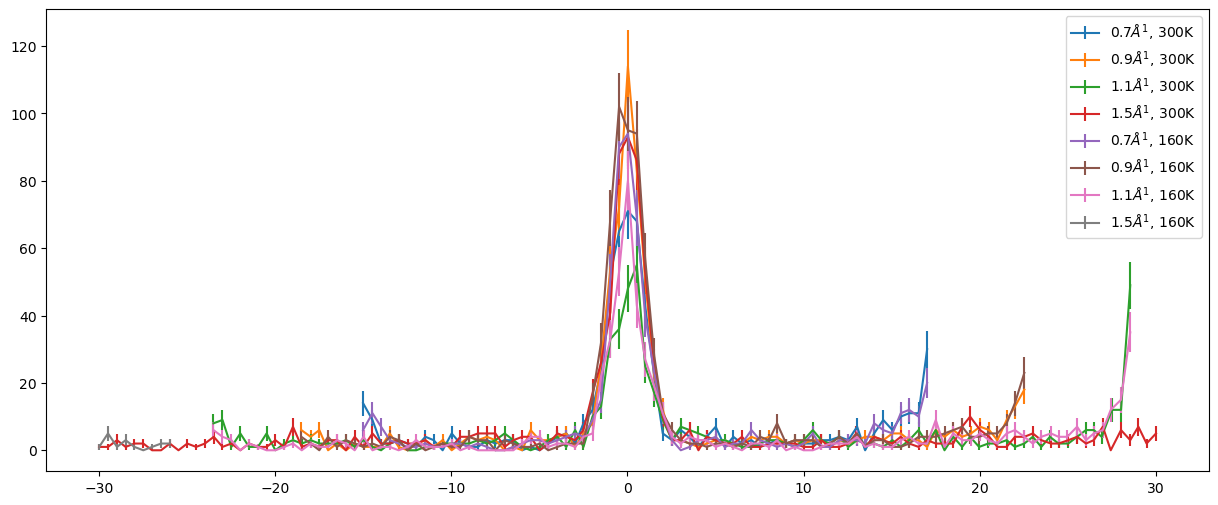

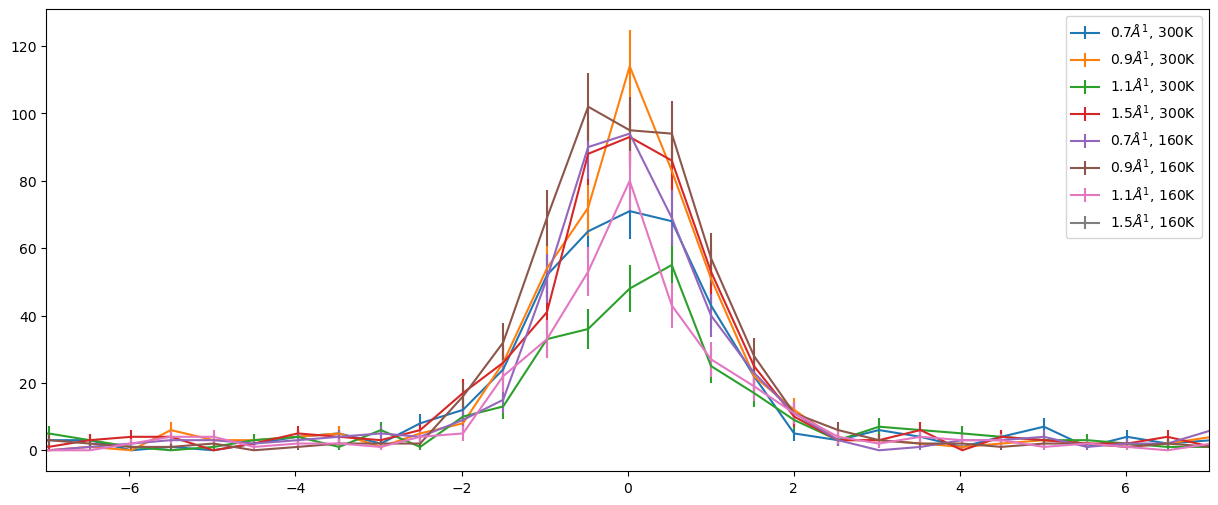

In [38]:
plt.figure(figsize=(15,6))
for T in [300, 160]:
    for q in [.7, .9, 1.1, 1.5]:
        S = data.loc[Nempty[T,q]].data
        plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\AA^1$, {:.0f}K'.format(q, T))
plt.legend()

plt.figure(figsize=(15,6))
for T in [300, 160]:
    for q in [.7, .9, 1.1, 1.5]:
        S = data.loc[Nempty[T,q]].data
        plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\AA^1$, {:.0f}K'.format(q, T))
plt.legend()
plt.xlim(-7,7)